# Tatoeba translation scores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette("muted")

In [3]:
PLOTS_PATH = "./plots"

In [6]:
df = pd.read_csv("./data/tatoeba_train_otus_scores.tsv", sep="\t", index_col=0)

df.sample(10)

,translation,cosine,bleu
line_idx,,,
119058,"Я не знал, что Том родился в Австралии.",0.000303,70.710678
50756,Учительница указала на меня палец и попросила ...,0.022942,19.156929
305340,Почему ты так строга к себе?,0.007117,27.776190
43855,У меня нет планов на сегодня.,0.011102,18.520283
315982,Я не хочу умирать в одиночестве.,0.002532,41.113362
127898,Он должен содержать свою мать и сестру.,0.020927,70.710678
67104,Я пытался предупредить ее.,0.078320,12.368465
213823,Я немного пьян.,0.007947,35.355339
219913,Том мог бы сделать это для Мэри.,0.000000,100.000000


In [9]:
# Normalize bleu, since it is multiplied by 100.0
df.bleu = df.bleu / 100

In [10]:
df.describe()

,cosine,bleu
count,491482.000000,491482.000000
mean,0.043265,0.492338
std,0.072209,0.331849
min,0.000000,0.004618
25%,0.000287,0.206124
50%,0.012435,0.379918
75%,0.056258,0.809107
max,1.332027,1.000000


In [11]:
from datetime import date
import os

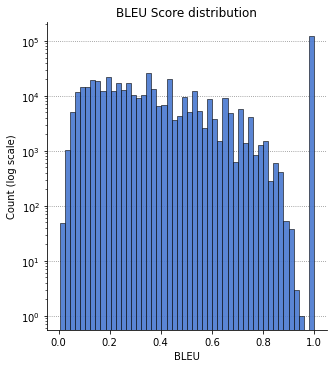

In [12]:
sns.displot(data=df, x="bleu", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="BLEU Score distribution",
    xlabel="BLEU",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"bleu_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

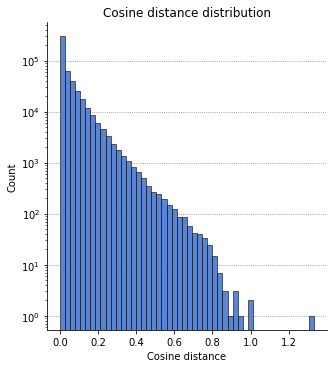

In [13]:
sns.displot(data=df, x="cosine", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="Cosine distance distribution",
    xlabel="Cosine distance",
    ylabel="Count",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"cosine_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

In [28]:
from matplotlib.colors import LogNorm

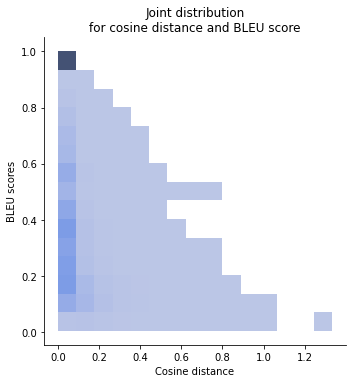

In [31]:
sns.displot(data=df, x="cosine", y="bleu", bins=15, hue_norm=LogNorm())

ax = plt.gca()
ax.set(
    title="Joint distribution\nfor cosine distance and BLEU score",
    xlabel="Cosine distance",
    ylabel="BLEU scores",
)

plt.savefig(
    os.path.join(PLOTS_PATH, f"joint_distr_cosine_bleu_15_bins_{date.today()}.pdf"),
    bbox_inches="tight"
)

In [58]:
print("Correlation between evaluation scores")

df.corr()

Correlation between evaluation scores


,cosine,bleu
cosine,1.000000,-0.475757
bleu,-0.475757,1.000000


## Separating data into bad translations and good translations

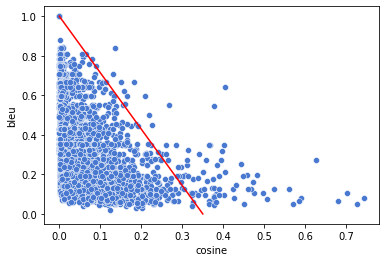

In [46]:
sns.scatterplot(data=df.sample(5000), y="bleu", x="cosine")

plt.plot([0, 0.35], [1, 0], c="r")

plt.show()

In [57]:
cut_df = df[((df.bleu - 20 / 7 * df.cosine) < 0) & (df.bleu > 0.4)]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 1293


,translation,cosine,bleu
line_idx,,,
56008,Тома трижды выстрелили в спину.,0.171484,0.430125
463826,Я ценю вашу позицию.,0.157124,0.427287
127272,Том промок.,0.168484,0.451386
337445,Правильные ошибки.,0.204098,0.550321
384134,"Счет, пожалуйста.",0.308525,0.594604
261315,Терпение.,0.470843,0.500000
321257,"Кто-то, должно быть, оставил воду в течении.",0.197078,0.537285
265819,Ясно.,0.260434,0.500000
342076,"Я чувствую, что перевод стал очень неприятным.",0.185114,0.467138


In [96]:
# Zone of idiomes
cut_df = df[df.cosine > 0.8]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 33


,translation,cosine,bleu
68962,"Предвидимая опасность — это опасность, которой...",0.807362,0.049900
426306,Многие хрени делают из хлама.,0.832403,0.081167
98951,У маленьких горшков длинные ручки.,0.806493,0.081167
133332,Многие делают щекотку.,0.926431,0.058764
47231,Дождь идет кошкам и собакам.,0.821410,0.081167
300389,Естественно.,0.823215,0.151633
262133,Это кусок торта.,0.832333,0.159736
423224,Поговорите о дьяволе и он обязательно появится.,0.956265,0.055224
328865,Цепочка не срабатывает на самом слабом звене.,0.806969,0.055224
241218,Вааааааааааааааааааааааааааааааааааааааааааааа...,1.332027,0.067668


In [97]:
# Great translations by both metrics
cut_df = df[(df.cosine < 0.1) & (df.bleu > 0.9)]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 121244


,translation,cosine,bleu
58741,Это все?,0.0,1.0
199553,Я оставил им пару сообщений.,0.0,1.0
41384,Чем я могу ему помочь?,0.0,1.0
325601,Ты любишь слонов.,0.0,1.0
96935,"Мэри сказала мне, что хочет поговорить.",0.0,1.0
454040,Я тоже жил в Гамбурге.,0.0,1.0
122033,Я из Дании.,0.0,1.0
486247,Пора вернуться к реальности.,0.0,1.0
118413,Мы с Томом давно женаты.,0.0,1.0
100606,У него новая девушка.,0.0,1.0
